## Feature Engineer

Feature Engineer tem o propósito de escolher ou reduzir o número de colunas
- A escolha das melhores colunas fica por conta da Feature Selection
- A Feature Engineer faz a redução de dimensionalidade
  - Reduz o número de colunas
  - Cada coluna é uma dimensão
  
> Reduzir o número de colunas pode, OU NÃO, diminuir a precisão do modelo

### Modelo PCA
É um modelo de junção de vetores
- Mescla colunas que apontam para o mesmo lugar

> Quanto mais idade, maior % de doenças como a diabetes

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
diabetes=load_diabetes()

In [3]:
X=diabetes.data

In [4]:
y=diabetes.target

y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
# y = 0 se y < 200; se não 1
y=[0 if y<200 else 1 for y in y]

In [6]:
y

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [7]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [8]:
from sklearn.decomposition import PCA

In [9]:
# Tinham 9 colunas e estamos transformando em 2
X_pca=PCA(n_components=2).fit_transform(X)

In [10]:
df=pd.DataFrame(X_pca,columns=['col1','col2'])

In [11]:
df['target']=y

df

,col1,col2,target
0,0.027931,-0.092601,0
1,-0.134686,0.065263,0
2,0.012945,-0.077764,0
3,0.002345,0.018182,1
4,-0.035981,0.038621,0
...,...,...,...
437,0.058958,-0.049275,0
438,0.060155,0.036211,0
439,-0.009763,-0.057337,0
440,0.032956,0.009994,1


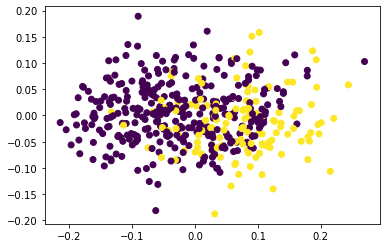

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots()
categories = np.unique(df['target'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  

df["Color"] = df['target'].apply(lambda x: colordict[x])
ax.scatter(df['col1'], df['col2'], c=df.Color)



In [13]:
X=df.drop(['target'],axis=1)

In [14]:
y=df['target']

In [15]:
from sklearn.model_selection import train_test_split

# Separando em treino e teste
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [16]:
# Instanciando o modelo de rede neural classificadora
from sklearn.neural_network import MLPClassifier

clf=MLPClassifier()
clf.fit(X_train,y_train) # Treinando

C:\Users\MorelRob\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [17]:
# Testando o treino
y_pred=clf.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        33

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



In [19]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred=clf.predict(X_test)

In [21]:
y_test

194    0
255    0
382    0
137    1
120    1
      ..
236    0
164    1
258    0
177    1
38     1
Name: target, Length: 111, dtype: int64

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        33

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

